# Példa 2.1


Az alábbi egyenes rúd terhelése az $\textbf{A}$ keresztmetszetben működő $M_{1}=2 \, \rm{Nm}$ nyomaték.
 A tartó hajlítómerevsége $150 \, \rm{Nm^{2}}$, az $\textbf{AB}$ és $\textbf{BC}$ szakaszok hossza $L=1\,\rm{m}$.
 
Feladatok:

a) Határozzuk meg a $\textbf{BC}$ szakaszon a maximális lehajlás értékét és helyét; 

b) Számítsuk ki az $\textbf{A}$, $\textbf{B}$ és $\textbf{C}$ keresztmetszetekben a szögelfordulásokat és az $\textbf{A}$ helyen a lehajlás értékét!

c) Mekkora $d$ átmérőjű kör keresztmetszetű acélból ($E=200\,\rm{GPa}$) készítsük a tartót ha azt szeretnék, hogy az $\textbf{A}$ keresztmetszet lehajlása $10\, \rm{mm}$ legyen?



<img src="Fig_2.1.png" style="width: 400px;">

# Megoldás

Szükségünk lesz a `sympy` modulra. Definiáljuk a szimbólumokat, az adatokat megadjuk és listába tesszük a könnyebb behelyettesítés miatt. A hajlítómerevséget IE-vel jelöljük.

In [1]:
import sympy as sp
sp.init_printing()

M1, L, IE, E, x = sp.symbols('M1, L, IE, E, x')

M1_adat = 2 #Nm
L_adat = 1 #m
IE_adat = 150 #Nm^2
E_adat = 200e9 #Pa

adatok = [(M1,M1_adat),(L,L_adat),(IE,IE_adat),(E,E_adat)]


#### A reakcióerők kiszámítása:

Írjuk fel a $\textbf{C}$ pontra a nyomaték egyensúly egyenletét, majd a rúdra a függőleges ($y$) erők egyensúlyát:
$$M_1+L F_{By}=0,$$
$$F_{By}+F_{Cy}=0.$$


In [2]:
FBy = M1/L
FCy = -FBy

#### Differenciálegyenlet

Válasszunk egy koordináta rendszert a differenciálegyenlet felírásához!
<img src="Fig_2.1b.png" style="width: 400px;">

A hajlító nyomatéki függvény két szakaszból áll:
$$M_{h1}(x)=\frac{M_1}{L}x,\; \rm{ha} \; 0\le x < L,$$

$$M_{h2}(x)=M_1,\; \rm{ha} \; L\le x \le 2L.$$

In [3]:
Mh1 = M1/L*x
Mh2 = M1

##### I. szakasz

A rugalmas szál differenciálegyenlete az I. szakaszon:
$$-IE w_1''=M_{h1}.$$

A `sympy` számára $w$-t nem adhatjuk meg egyszerű szimbólumként, ugyanis a szimbólumok (ismeretlen) konkrét értékeket jelölnek (ezeket nem tudjuk rendesen deriválni). Függvényeket a következő szintaktikával kell definiálni: `fuggveny=sp.Function('fuggveny')(valtozo)`.

Függvényeket `.diff(valtozo, N)` szintaktikával deriválhatunk `valtozo` szerint `N`-szer. (Az `N=1`-t nem kell kiírni.)

A fenti egyenletet 0-ra rendezve adjuk meg a programban. 

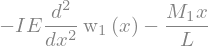

In [4]:
w1 = sp.Function('w1')(x) #megadjuk w1-t, mint x ismeretlen függvényét

diffegy1 = -Mh1-IE*w1.diff(x,2)
diffegy1

Mivel ez egy nagyon egyszerű differenciálegyenlet, ezért a $w_1(x)$-et megkaphatjuk az $-IE w_1''=M_{h1}$ egyenlet kétszeri integrálásával.

Megjegyzés: akár a két integrálást manuálisan is megcsinálhatjuk, de ekkor az integrálási konstansokat nem adja hozzá a `sympy`, ezt nekünk kell megtenni:

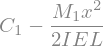

In [5]:
temp=sp.integrate(-Mh1/IE,x) + sp.Symbol('C_1')
temp

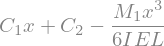

In [6]:
sp.integrate(temp,x) + sp.Symbol('C_2')

Ha szükségünk van a $C_n$ integrálási konstansokra akkor érdemes a `dsolve`-ot használni, mert az automatikusan kezeli őket.

A differenciálegyenleteket a `dsolve(diffegyenlet,fuggveny)` utasítással tudjuk megoldani.

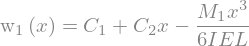

In [7]:
dsolu1 = sp.dsolve(diffegy1,w1)
dsolu1

Ne ijedjünk meg, ha a `dsolve` $C_n$-es tagokat a megszokottól eltérő számozással kapjuk meg.
A kapott megoldást kezelhetnénk algebrai egyenletként és a peremfeltételeket beírva megkaphatnánk $C_1$-t és $C_2$-t.
Ennél egyszerűbb, ha a `dsolve`-nak adjuk meg a peremfeltételeket. 

A szintaktikát egy pédával mutatjuk be. Az $f(x)$ függvényhez akarjuk megadni az $f(x_0)=y_0$ és $f''(x_1)=y_1$ peremfeltételeket. Ekkor a peremfeltételeket leíró struktúra: `{f.subs(x,x0): y0, f(x).diff(x,2).subs(x, x1): y2}`. Ezt a `dsolve`-nak a `dsolve(diffegenlet,fuggveny, ics={...})` szintaktikával adhatjuk meg, ahol ics (initial conditions) a kezdeti értékek, és peremfeltételek ( a különbségről majd matekból, most peremfeltétel van).

$w_1(x)$-nek a következő peremfeltételeket kell teljesítenie:
$$w_1(0)=0,$$
$$w_1(L)=0.$$

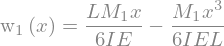

In [8]:
peremf1 = {w1.subs(x,0):0,w1.subs(x,L):0}
pfsolu1 = sp.dsolve(diffegy1,w1,ics=peremf1)
pfsolu1

A maximális elmozduláshoz ennek a függvénynek a szélsőértékére van szükségünk . Ezt ott találhatjuk, ahol a deriváltja (a szögelfordulási függvény - $\varphi_1(x)$ - értéke) zérus.

A `pfsolu1` nem egy egyszerű kifejezés, hanem egy `sympy` `Equation` (egyenlet), aminek bal oldala `w1(x)`, a jobb oldala a számunkra fontos kifejezés. A jobb oldalt az `.rhs` (right hand side) utasítással kérhetjük ki. (Hasonlóan az `.lhs` utasítás a bal oldalt adja.)

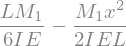

In [9]:
jobboldal1 = pfsolu1.rhs
φ1 = jobboldal1.diff(x) #\varphi + tab
φ1

Ennek az egyenletnek keressük a zérushelyét. Ez algebrai egyenlet, amit a `solve` paranccsal oldhatunk meg.

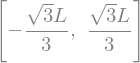

In [10]:
zerushely = sp.solve(φ1,x)
zerushely

Nekünk csak a pozitív gyök kell (negatív $x$ irányban nincs rúd...). Így megkapjuk a maximális elmozdulás helyét, amit célszerű numerikusan kiértékelnünk.

In [11]:
valodigyok = zerushely[1]
print("Maximális elmozdulás helye C-től számítva [m]:")
valodigyok.subs(adatok).evalf(5) #behelyettesítés, kiértékelés 5 értékesjegyre

Maximális elmozdulás helye C-től számítva [m]:


Ezt behelyettesítve $w_1(x)$-be kapjuk a maximális elmozdulás értékét.

In [12]:
maxelmozd = jobboldal1.subs(x,valodigyok).subs(adatok)
print("Maximális elmozdulás mértéke [m]:")
maxelmozd.evalf(5)

Maximális elmozdulás mértéke [m]:


Ki tudjuk számítani a szögelfordulásokat a $\textbf{C}$ és $\textbf{B}$ pontokban, ha $x=0$-t és $x=L$-t helyettesítünk $\varphi_1(x)$-be. A numerikus értékeket az adatok behelyettesítése után kaphatjuk meg. Ezeket célszerű átváltanunk radiánról fokba (*180/pi).

In [13]:
φC = φ1.subs(x,0)
φB = φ1.subs(x,L)

print("Elfordulás a C pontban [deg]:")
display(φC.subs(adatok)*180/sp.pi.evalf(5))

print("Elfordulás a B pontban [deg]:")
φB.subs(adatok)*180/sp.pi.evalf(5)

Elfordulás a C pontban [deg]:


Elfordulás a B pontban [deg]:


##### II. szakasz

A rugalmas szál differenciálegyenlete a II. szakaszon:
$$-IE w_2''=M_{h2}.$$

Az egyenletet az I. szakaszhoz hasonlóan adhatjuk meg.

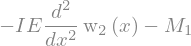

In [14]:
w2 = sp.Function('w2')(x) #megadjuk w2-t, mint x ismeretlen függvényét

diffegy2 = -Mh2-IE*w2.diff(x,2)
diffegy2

Az illesztési feltétel:
$$w_1'(L)=w_2'(L).$$
Peremfeltétel:
$$w_2(L)=0.$$

$w_1'(L)$-t már kiszámítottuk, mint $\varphi_1(L)$.

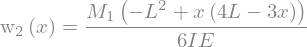

In [15]:
peremf2 = {w2.subs(x,L):0,w2.diff(x).subs(x,L):φB}
pfsolu2 = sp.dsolve(diffegy2,w2,ics=peremf2)
pfsolu2.simplify() #egyszerűsítve jelenítjük meg a megoldást, hogy olvashatóbb legyen

Az elfordulási függvényt ($\varphi_2(x)$) itt is az előbbi megoldás jobb oldalának deriváltjaként kaphatjuk.

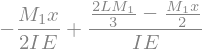

In [16]:
jobboldal2 = pfsolu2.rhs
φ2 = jobboldal2.diff(x) #\varphi + tab
φ2

$w_2(x)$-be és $\varphi_2(x)$-be $x=2L$-t helyettesítve megkaphatjuk az elmozdulást és elfordulást az $\textbf{A}$ pontban. A numerikus értékeket az adatok behelyettesítése után kaphatjuk meg. Az elfordulást célszerű átváltanunk radiánról fokba (*180/pi).

In [17]:
wA = jobboldal2.subs(x,2*L)
φA = φ2.subs(x,2*L)

print("Elmozdulás az A pontban [m]:")
display(wA.subs(adatok).evalf(5))

print("Elfordulás az A pontban [deg]:")
φA.subs(adatok)*180/sp.pi.evalf(5)

Elmozdulás az A pontban [m]:


Elfordulás az A pontban [deg]:


#### Ábrázolás

Szükségünk lesz a `matplotlib` modulra, a `linspace` és `rad2deg` (radiánt fokba váltó) függvényre.

In [18]:
import matplotlib.pyplot as plt
from numpy import linspace, rad2deg

A kapott $w_1(x)$ és $w_2(x)$ függvények szakaszonként adják a teljes rúdon értelmezett lehajlásfüggvényt. A `Piecewise` segítségével a kódban is megtehetjük ezt - így egyszerre tudunk a rúd teljes hosszán behelyettesíteni.

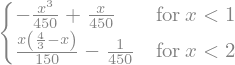

In [19]:
w = sp.Piecewise((jobboldal1,x<L),(jobboldal2,x<2*L))
w = w.subs(adatok)
w

Hozzuk létre az $x$ adatsort és végezzük el a behelyettesítést!

In [20]:
xdata = linspace(2*L_adat,0,201)
wdata = [w.subs(x,xc) for xc in xdata] #a Piecewise használata nélkül csak külön-külön tudnánk
                                       #létrehozni ezeket az adatsorokat w1-re és w2-re

Mivel az $x$ tengelyünk balra mutat, az ábrát "fordítva" kapjuk meg a feladatban megadotthoz képest. Ez matematikailag helyes, de zavaró lehet.

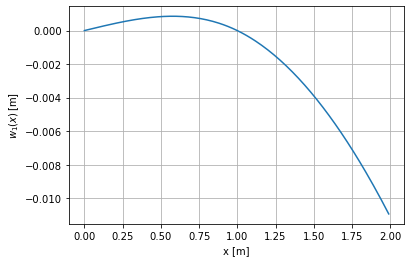

In [21]:
plt.plot(xdata,wdata)
plt.grid()
plt.xlabel("x [m]")
plt.ylabel(r"$w_1(x) \,\rm{[m]}$")
plt.show()

Ha az ábrázolás során az $x$ tengelyt $\textbf{A}$-ból szeretnénk indítani, hogy jobbra mutasson, akkor meg kell fordítanunk az `xdata` vagy `wdata` válozóban az elemek sorrendjét. Ezt legtömörebben egy indexelési "trükkel" tehetjük meg: `[::-1]`.

A `[::-1]` magyarázata érdeklődőknek:

Legyen `l=list(range(11))` azaz `l==[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`.

`Python`-ban egy listát indexelhetünk a következő módon: `l[kezdet:vege:lepes]`. Ez a szintaktika a `kezdet`-től számítva `vege-1`-ig számol, `lepes` lépésközzel. A `l[0:10]` a `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`-t adja (a vége-index nincs benne!). Az `l[0:10:2]` a `[0, 2, 4, 6, 8]`-t adja, azaz az előbbi eredménynek minden második elemét.

Ha negatív lépésközt adunk meg, akkor visszafélé megyünk és az első két index értelme felcserélődik. Azaz `l[10:0:-1]`-el kapjuk a listát visszafelé: `[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]`. Ha kihagyjuk az első két indexet (a kettőspontot ekkor is ki kell tenni!), akkor a Python automatikusan az első illetve utolsó indexet írja be a kihagyott index helyére. Így adódik a `[::-1]` írásmód.

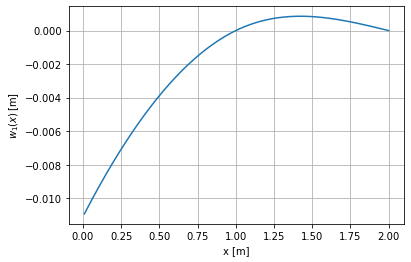

In [22]:
plt.plot(xdata[::-1],wdata)
plt.grid()
plt.xlabel("x [m]")
plt.ylabel(r"$w_1(x) \,\rm{[m]}$")
plt.show()

#### Az $\textbf{A}$ pont lehajlásának beállítása

Írjuk ki a $w_2(x)$ függvény értékét az $\textbf{A}$ helyen! Ezt a feladat korábbi részében a `wA` változóba mentettük el.

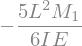

In [23]:
wA

A $d$ átmérő a hajlítómerevséget (IE) fogja befolyásolni, azaz ki kell fejeznünk IE-t a fenti összefüggésből. A kívánt lehajlás értéke $w_A=-10 \, \rm{mm}$. Ezt a kódban méterben kell megadnunk, mert korábban is méterben számoltunk.

IE kifejezéséhez a $w_2(A)=w_A$ egyenletet oldjuk meg IE-re. A megoldást egy egy elemű listában kapjuk.

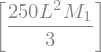

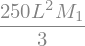

In [24]:
wA_kivant = sp.Rational(-1,100) #m (rational: közönséges törtet készít)
IE_sol = sp.solve(wA-wA_kivant,IE)
display(IE_sol) #IE_sol egy 1 elemű lista
IE_kif = IE_sol[0] #kiszedjük a lista elemét egy új változóba
IE_kif

Ebbe a kifejezésbe behelyettesíve megkapjuk a kívánt IE értéket.

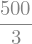

In [25]:
IE_kif.subs(adatok) #Nm^2

Tudjuk, hogy:
$$IE=I\cdot E,$$
valamint kör keresztmetszetnél:
$$I=\frac{d^4 \pi}{64}.$$

In [26]:
I_kivant = IE_kif/E
I_kivant.subs(adatok).evalf(5)

A fentebbi összefüggésből $d$ kifejezhető:
$$d=\sqrt[4]{\frac{64I}{\pi}}$$

In [27]:
d = sp.root(64*I_kivant/sp.pi,4)#I_kivant
print("A szükséges átmérő [m]:")
d.subs(adatok).evalf(5) #m

A szükséges átmérő [m]:
